# Анализ клиентов банка и их сегментация

**Описание проекта**  
На рынке осуществляет деятельность региональный банк «Метанпромбанк». В последнее время в банке наблюдается существенный отток клиентов, что создает риски для его дальнейшего существования.  
Следует проанализировать клиентов регионального банка и выделить сегменты клиентов, которые склонны уходить из банка.
В наличии имеется датасет, который содержит данные о клиентах банка «Метанпромбанк». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.  
Целью проведения анализа является сегментация клиентов банки и выявление приоритетных сегментов для выработки маркетинговых мероприятий, направленных на сокращение уровня оттока клиентов.  
Заказчиком проекта выступает маркетинговое подразделение банка. Информация нужна менеджеру, который занимается маркетинговыми компаниями и работает в тесной связи с менеджерами продуктов.  
Ранее было проведено подобное исследование, связанное с оттоком клиентов, но оно устарело, так как состав клиентов банка сменился и старые сегменты потеряли свою актуальность. По итогам исследования нужно подготовить дашборд, содержащий актуальную информацию.

**Задачи исследования:**  
- Проведение исследовательского анализа данных, определение всех значимых признаков клиентов, склонных к оттоку (интервалы значений характеристик, которые связаны с повышенным оттоком, портреты типичных клиентов, которые склонны и не склонны уходить из банка и т.д)
- Формулировка и проверка статистических гипотез:
  - гипотеза различия дохода между теми клиентами, которые ушли и теми, которые остались;
  - формулировка и проверка статистической гипотезы относительно представленных данных, которая поможет внести ясность в исследование.
- Формирование сегментов, выборка лучших из них и подготовка рекомендаций по приоритетным сегментам.
- Подготовка презентации с основными ключевыми моментами.

**План проведения исследования:** 
1. Открытие файла с данными и изучение общей информации:
- общая информация о данных в таблице – размер, описание столбцов;
- проверка на полноту данных. Определение количества пропусков и принятие решения о целесообразности их заполнения;
- проверка на соответствие типов данных таблицы.

2. Предобработка данных:
- приведение наименований столбцов к единому стилю;
- проверка данных на явные и неявные дубликаты;
- заполнение пропусков данных (при принятии соответствующего решения);
- изменение типов данных таблицы (при необходимости).

3. Исследовательский анализ данных:
- определение значимых признаков клиентов, склонных к оттоку;
- распределение признаков клиентов;
- исследование коррелирующих признаков, визуализация корреляции между разными признаками;
- определение портретов клиентов и их сравнение.

4. Проверка статистических гипотез:
- проверка гипотезы о различии дохода между теми клиентами, которые ушли и теми, которые остались;
- формулировка и проверка статистической гипотезы относительно представленных данных, которая поможет внести ясность в исследование.
Основные этапы тестирования:  
- разделение клиентов на группы в соответствие с гипотезой;
- определение методики проведения теста;
- проведение тестирования и интерпретация результатов.

5. Сегментация клиентов
- промежуточный итог о том, какие показатели стратегически влияют на отток клиентов;
- подготовка данных для сегментации и ее проведение;
- определение приоритетных сегментов.

6. Выводы и рекомендации по отдельным сегментам клиентов для заказчика

**Содержание проекта**

1. [Открытие файла и изучение информации в таблице](#review1)
2. [Предобработка данных](#preprocessing2)
    * [Приведение наименований столбцов к единому стилю](#preprocessing21)
    * [Анализ пропусков столбца 'balance'](#preprocessing22)
    * [Удаление строк с пропущенными значениями в столбце 'age'](#preprocessing23)
    * [Проверка данных на дубликаты](#preprocessing24)
    * [Проверка данных на неявные дубликаты](#preprocessing25)
    * [Преобразование значений в столбце 'genre' и 'city'](#preprocessing26)
    * [Изменение типов данных](#preprocessing27)
3. [Исследовательский анализ данных](#analysis3)
    * [Распределение клиентов по признакам](#analysis31)
    * [Оценка корреляции признаков клиентов](#analysis32)
    * [Распределение клиентов по признаку оттока](#analysis33)
    * [Категоризация клиентов, склонных к оттоку, по отдельным признакам](#analysis34)
4. [Проверка статистических гипотез](#testing4)
    * [Проверка гипотезы о различии между доходами клиентов, склонных к оттоку  и доходами клиентов, кто не планирует уходить](#testing41)
    * [Проверка гипотезы о различии между кредитными рейтингами клиентов, склонных к оттоку и клиентов, кто не планирует уходить](#testing42)
5. [Сегментация клиентов банка по признаку оттока](#segmentation5)
6. [Выводы и рекомендации](#conclusion6)
7. [Материалы (ссылки на презентацию и дашборд)](#information7)

# Открытие файла и изучение информации в таблице <a id="review1"></a>

In [1]:
# импортируем нужные для работы библиотеки
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from scipy import stats as st
import numpy as np
import warnings

In [2]:
# откроем файл с данными о клиентах банка и выведем на экран первые 5 строк
data = pd.read_csv('/datasets/bank_scrooge.csv')  
pd.options.display.float_format = '{:,.2f}'.format
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,"59,214.82",2,0,1,"75,719.14",1
1,146556,861.00,Рыбинск,Ж,37.00,5,"850,594.33",3,1,0,"86,621.77",0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,"107,683.34",0
3,225363,866.00,Ярославль,Ж,51.00,5,"1,524,746.26",2,0,1,"174,423.53",1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,"67,353.16",1


In [3]:
# общая инфорамция о данных в таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Таблица содержит данные о клиентах банка «Метанпромбанк». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. 
Описание данных таблицы:  
UserID — идентификатор пользователя,  
score — баллы кредитного скоринга,  
City — город,  
Gender — пол,  
Age — возраст,  
Equity — количество баллов собственности  
Balance — баланс на счёте,  
Products — количество продуктов, которыми пользуется клиент,  
CreditCard — есть ли кредитная карта,  
Last_activity — активный клиент,  
estimated_salary — заработная плата клиента,  
Churn — ушёл или нет.

Всего в таблице содержится 10000 записей. Поля, содержащие данные о возрасте клиентов и балансе на счете, содержат пропуски.

In [4]:
data.isna().sum()

USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

Поле 'age' содержит 26 пропусков (0,26% от общего количества записей).  
В столбце 'balance' содержится 2295 пропусков (23% от общего количества). Удалять строки с пропущенными значениями или заполнять пропущенные данные в указанном столбце нецелесообразно, так как заполнение пропусков в данных столбцах средним или медианным значением может привести к существенному искажению результатов анализа.

array([[<Axes: title={'center': 'USERID'}>,
        <Axes: title={'center': 'score'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'equity'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'products'}>],
       [<Axes: title={'center': 'credit_card'}>,
        <Axes: title={'center': 'last_activity'}>,
        <Axes: title={'center': 'EST_SALARY'}>],
       [<Axes: title={'center': 'churn'}>, <Axes: >, <Axes: >]],
      dtype=object)

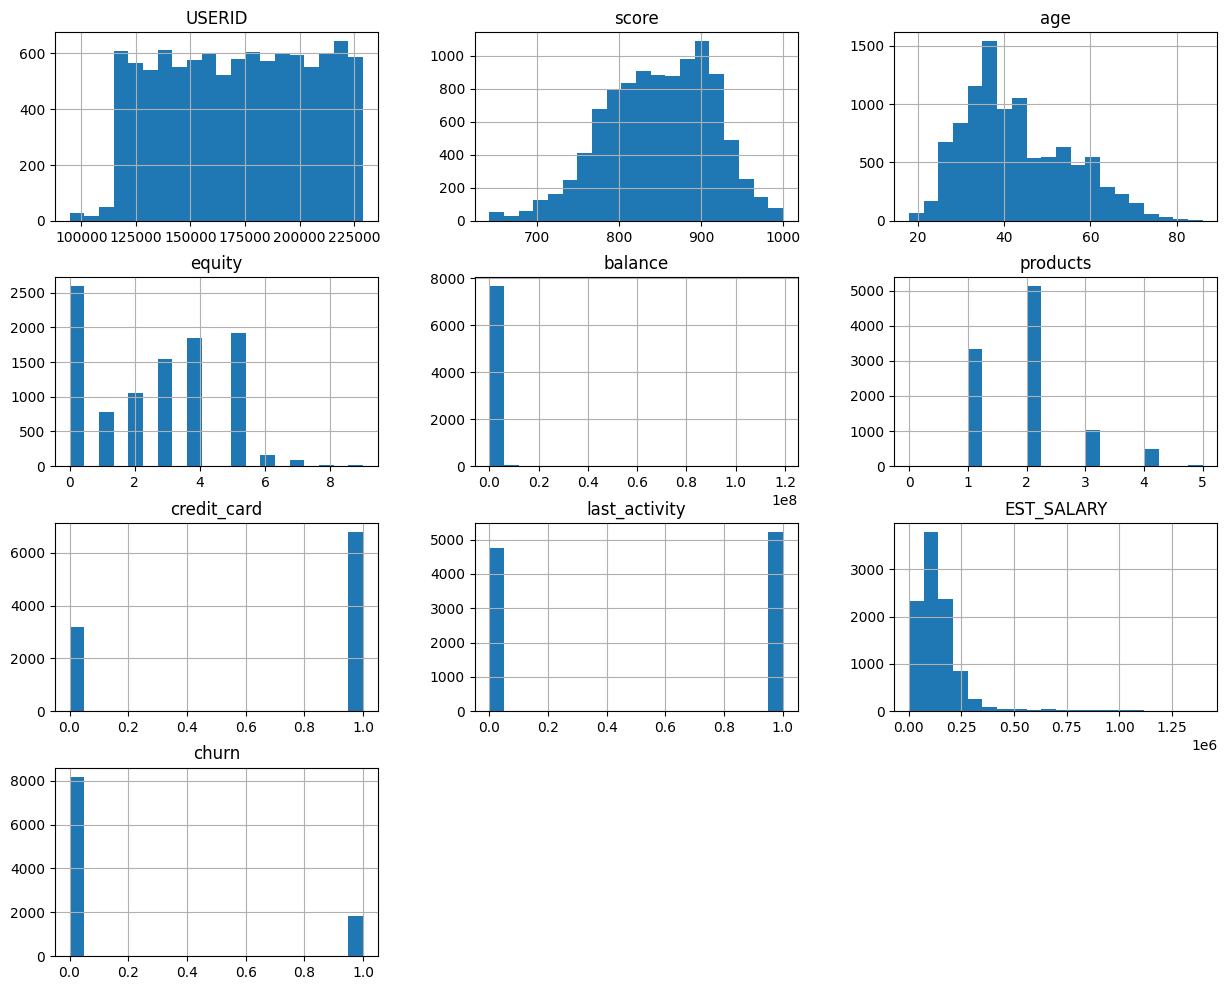

In [5]:
data.hist(figsize=(15, 12), bins=20)

In [6]:
# выведем уникальные значения и их количество в каждом столбце таблицы 
for col in data.columns:
    display(data[col].nunique())
    display(data[col].value_counts())
    print()

9927

141265    2
217826    2
126368    2
195884    2
202983    2
         ..
199413    1
205705    1
221433    1
152512    1
96267     1
Name: USERID, Length: 9927, dtype: int64

348

900.00    80
889.00    75
894.00    70
899.00    70
908.00    68
          ..
666.00     1
667.00     1
684.00     1
673.00     1
995.00     1
Name: score, Length: 348, dtype: int64

3

Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: city, dtype: int64

2

М    5005
Ж    4995
Name: gender, dtype: int64

68

36.00    414
37.00    402
33.00    392
35.00    388
34.00    384
        ... 
83.00      3
82.00      2
84.00      2
79.00      2
86.00      2
Name: age, Length: 68, dtype: int64

10

0    2592
5    1918
4    1850
3    1543
2    1052
1     774
6     161
7      80
8      17
9      13
Name: equity, dtype: int64

7701

26.00           2
0.00            2
38.00           2
39.00           2
59,214.82       1
               ..
924,011.29      1
1,452,458.87    1
1,294,391.76    1
1,106,127.02    1
1,180,886.70    1
Name: balance, Length: 7701, dtype: int64

6

2    5126
1    3341
3    1039
4     474
5      19
0       1
Name: products, dtype: int64

2

1    6804
0    3196
Name: credit_card, dtype: int64

2

1    5235
0    4765
Name: last_activity, dtype: int64

9996

49,742.87     2
108,250.17    2
176,348.18    2
381,868.89    2
75,719.14     1
             ..
163,867.40    1
124,613.12    1
88,651.54     1
127,424.00    1
21,422.37     1
Name: EST_SALARY, Length: 9996, dtype: int64

2

0    8180
1    1820
Name: churn, dtype: int64

# Предобработка данных <a id="preprocessing2"></a>

## Приведение наименований столбцов к единому стилю <a id="preprocessing21"></a>

In [7]:
data = data.rename(columns={'USERID':'user_id', 'EST_SALARY':'est_salary'})
data.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

## Анализ пропусков столбца 'balance' <a id="preprocessing22"></a>

Рассмотрим записи с пропусками данных в поле balance. Доля пропусков составляет 23% от общего количества записей.

In [8]:
# количество пропущенных значений в столбце 'balance' в разрезе городов присутствия банка
data.query('balance.isna()').groupby('city')['city'].count()

city
Ростов        235
Рыбинск       593
Ярославль    1467
Name: city, dtype: int64

Наибольшее количество пропусков наблюдается в отделении банка в Ярославле - 1467.

In [9]:
# количество нулевых значений в поле 'balance'
data.query('balance == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3900,179831,730.00,Ярославль,М,18.00,0,0.00,2,1,1,"64,548.33",0
6757,148456,813.00,Ярославль,М,20.00,2,0.00,2,1,0,"23,876.51",0


Всего имеется две записи с нулевыми значениями в поле 'balance'. Проверим связано ли наличие пустых значений с наличием признака оттока клиентов.

In [10]:
# количество пропущенных значений в столбце 'balance' по параметрам оттока
data.query('balance.isna()').groupby('churn')['churn']. count()

churn
0    2282
1      13
Name: churn, dtype: int64

Подавляющее большинство пропусков (99,4%) приходится на действующих клиентов, которые не планируют прекращать сотрудничество с банком.

In [11]:
# распределение среднего остатка по признаку оттока
data.groupby('churn').agg({'balance' : ['count', 'mean']})

balance             
        count         mean
churn                     
0        5898   733,982.59
1        1807 1,133,993.27

Можно сделать вывод, что наличие пропусков не связано с признаком оттока, так как они присутствуют у всех категорий клиентов по данному признаку.  
Пропуски данных есть в записях о клиентах всех отделений банка. У клиентов с признаком оттока существуют остатки на счетах.  
Нулевые значения баланса счета имеются только у двух клиентов. Фактически их бывает существенно больше. Можно предположить, что на месте пропусков должны быть нулевые остатки. Также возможной причиной появления пропусков может быть технический  сбой при выгрузке данных. Проверить данные предположения не получится.  
В связи с существенным количеством таких записей производить их удаление или заполнение пустых значений другими нецелесообразно в связи с возможными искажениями результатов анализа.

In [12]:
# расчет количества клиентов в разрезе количества банковских продуктов и наличия кредитной карты
date_products = data.pivot_table(index=['products','credit_card'], values = 'user_id', aggfunc='count')\
.rename(columns={'user_id':'user_count'}).sort_values(by='products', ascending=False)
date_products.reset_index(inplace=True)
date_products['user_share'] = date_products['user_count'] / date_products['user_count'].sum()
date_products['user_share'] = date_products['user_share'].apply('{:.2%}'.format)
date_products

,products,credit_card,user_count,user_share
0,5,1,19,0.19%
1,4,0,151,1.51%
2,4,1,323,3.23%
3,3,0,669,6.69%
4,3,1,370,3.70%
5,2,0,1920,19.20%
6,2,1,3206,32.06%
7,1,0,455,4.55%
8,1,1,2886,28.86%
9,0,0,1,0.01%


Наибольшую долю составляют клиенты банка, у которых имеется кредитная карта и еще какой-нибудь один банковский продукт (32,1%). Вторая по численности группа представлена клиентами, у которых отсутствуют банковские продукты, кроме кредитной карты (28,9%).  
Среди клиентов присутствует только одно физическое лицо, у которого отсутствуют банковские продукты. Кредитные карты у него также отсутствуют.
Выведем информацию о данном лице.

In [13]:
data.query('products == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.00,Рыбинск,Ж,79.00,3,NaN,0,0,0,"25,063.96",1


У вышеуказанного лица, помимо банковских продуктов, отсутствует также информация о балансе на счете.  
Поэтому указанное лицо можно не считать клиентом банка и, соответственно, удалить из списка клиентов.

## Удаление строк с пропущенными значениями в столбце 'age' и нулевыми значениями в столбце 'products' <a id="preprocessing23"></a>

In [14]:
data = data.dropna(subset=['age'])
data = data.query('products > 0')

In [15]:
data.shape

(9973, 12)

Общее количество строк после удаления записей с пропусками в столбце 'age' составляет 9973.

## Проверка данных на дубликаты <a id="preprocessing24"></a>

In [16]:
data.duplicated().sum()

0

Дублируемые строки в таблице отсутствуют.

## Проверка данных на неявные дубликаты <a id="preprocessing25"></a>

In [17]:
data.duplicated(subset='user_id', keep='first').sum()

50

Количество строк с одинаковым значением 'user_id' составляет 50. Проверим наличие дубликатов дополнительно по колонке 'city'.

In [18]:
data.duplicated(subset=['user_id', 'city']).sum()

0

Количество строк с одинаковыми значениями ID клиентов и города, в котором находится отделение банка, равно нулю.  
Можно сделать вывод, что значения ID присваиваются клиентам автоматически и клиенты с одинаковыми ID могут встречаться в разных отделениях банка. Неявные дубликаты в таблице отсутствуют.

## Преобразование значений в столбце 'genre' и 'city' <a id="preprocessing26"></a>

In [19]:
# заменим признаки пола - "М" на 1, "Ж" на 0:
data.loc[data['gender']=='М', 'gender'] = 1
data.loc[data['gender']=='Ж','gender'] = 0

In [20]:
# преобразуем категориальную переменную 'city' в числовую.
data['city_orig'] = data['city']
data = pd.get_dummies (data, columns=['city'])

## Изменение типов данных <a id="preprocessing27"></a>

In [21]:
# заменим в части столбцов типы данных с 'float' на 'int'.
data = data.astype({'score':int, 'gender':int, 'age':int, 'city_Ростов':int, 'city_Рыбинск':int, 'city_Ярославль':int})

Вывод:  
В процессе предобработки данных осуществили действия:  
Привели наименования столбцов к единому стилю.  
Проверили столбцы таблиц на наличие пропусков, пропуски присутствуют в двух столбцах - 'age' и 'balance'.  
Строки с пропущенными значениями в столбце 'age' были удалены в связи с их незначительным количеством (0,26% от общего количества строк). Также были удалены строки с нулевыми значениями в столбце 'products'.  
Проанализированы причины возможного появления пропусков в столбце 'balance'. Можно сделать вывод, что наличие пропусков не связано с признаком оттока клиентов, так как они присутствуют у всех категорий клиентов по данному признаку. У клиентов с признаком оттока существуют остатки на счетах.  
Нулевые значения баланса счета имеются только у двух клиентов. Фактически их бывает существенно больше. Можно предположить, что на месте пропусков должны быть нулевые остатки. Также возможной причиной появления пропусков может быть технический сбой при выгрузке данных.  
В связи с существенным количеством таких записей производить их удаление или заполнение пустых значений другими нецелесообразно в связи с возможными искажениями результатов анализа (доля пропусков составляет 23% от общего количества записей).  
Заменили признаки пола на целые числа - "М" на 1, "Ж" на 0. 
Проверили данные на наличие явных дубликатов, дубликаты отсутствуют.   
Проверили данные на наличие неявных дубликатов  по столбцам 'user_id' и 'city'. Неявные дубликаты отсутствуют.  
Заменили типы данных в части столбцов с 'float' на 'int'.  
Преобразовали категориальную переменную 'city' в числовую.

# Исследовательский анализ данных <a id="analysis3"></a>

## Распределение клиентов по признакам <a id="analysis31"></a>

In [22]:
# распределение признаков клиентов
data.describe()

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль
count,"9,973.00","9,973.00","9,973.00","9,973.00","9,973.00","7,695.00","9,973.00","9,973.00","9,973.00","9,973.00","9,973.00","9,973.00","9,973.00","9,973.00"
mean,"171,757.62",848.67,0.50,42.73,2.63,"827,245.59",1.87,0.68,0.52,"147,799.12",0.18,0.14,0.27,0.59
std,"33,696.37",65.39,0.50,12.18,1.98,"1,980,327.41",0.79,0.47,0.50,"139,287.08",0.39,0.35,0.44,0.49
min,"94,561.00",642.00,0.00,18.00,0.00,0.00,1.00,0.00,0.00,"2,546.30",0.00,0.00,0.00,0.00
25%,"142,757.00",802.00,0.00,33.00,0.00,"295,698.71",1.00,0.00,0.00,"75,252.02",0.00,0.00,0.00,0.00
50%,"172,651.00",853.00,1.00,40.00,3.00,"524,295.33",2.00,1.00,1.00,"119,643.06",0.00,0.00,0.00,1.00
75%,"201,164.00",900.00,1.00,51.00,4.00,"980,051.21",2.00,1.00,1.00,"174,499.96",0.00,0.00,1.00,1.00
max,"229,145.00","1,000.00",1.00,86.00,9.00,"119,113,552.01",5.00,1.00,1.00,"1,395,064.45",1.00,1.00,1.00,1.00


In [23]:
# создадим функцию для формирования графиков распределения:
def charts(data, hue=None):
    # графики для дискретных значений
    for column in ['city_orig', 'gender', 'equity', 'products', 'credit_card', 'last_activity', 'churn']:
        ax = sns.countplot(data=data, x=column, hue=hue)
        plt.title(f'Распределение клиентов по признаку {column}')
        plt.show()  
        
    plt.figure(figsize=(20,8))
    sns.countplot(data=data, x='age', hue=hue);
    plt.title('Распределение клиентов по возрасту')
    plt.show()

    # графики для непрерывных значений
    for column in ['score',  'balance', 'est_salary']:
        plt.figure(figsize=(10,5))
        sns.kdeplot(data=data, x=column, hue=hue);
        plt.title(f'Распределение клиентов по признаку {column}')
        plt.show()  

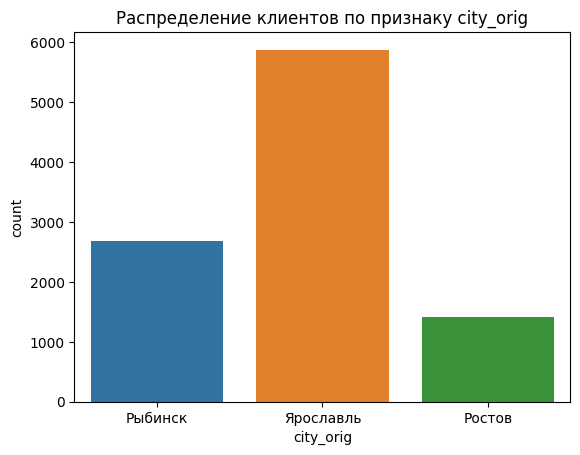

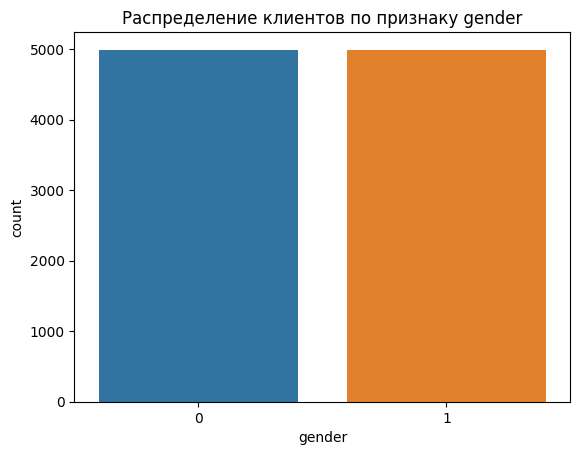

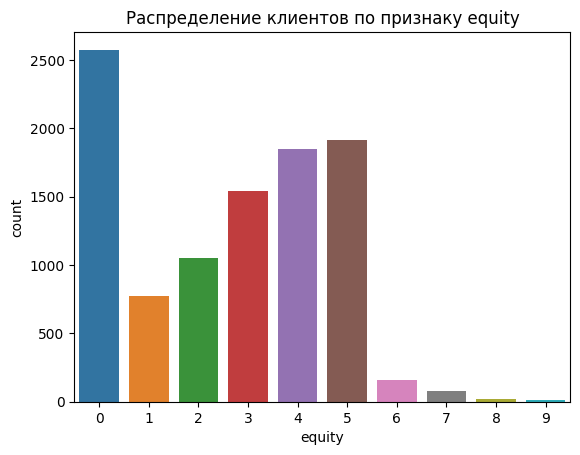

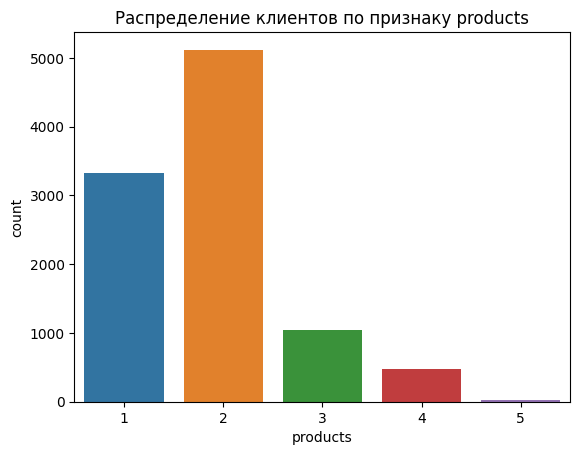

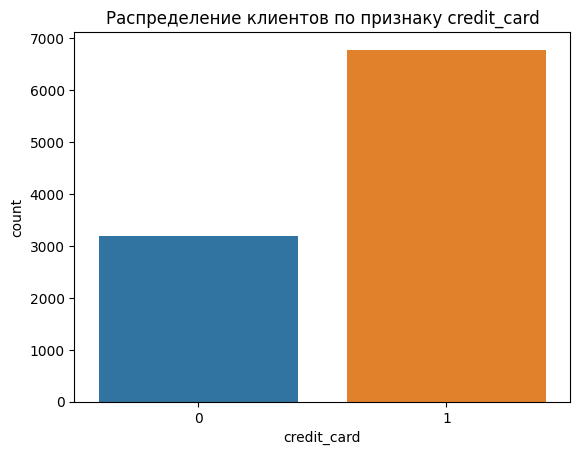

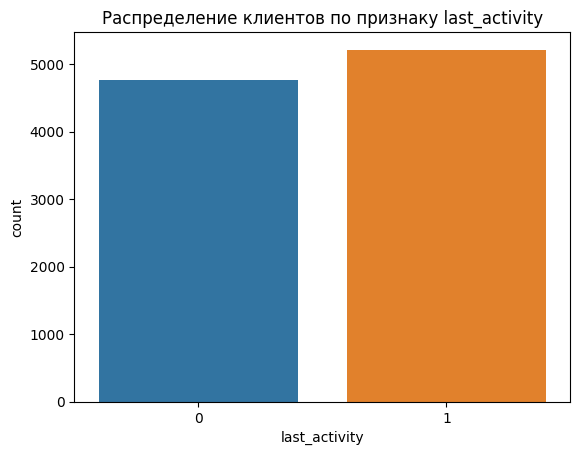

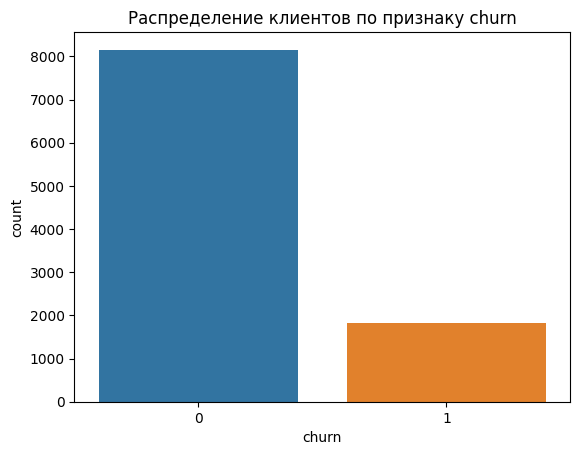

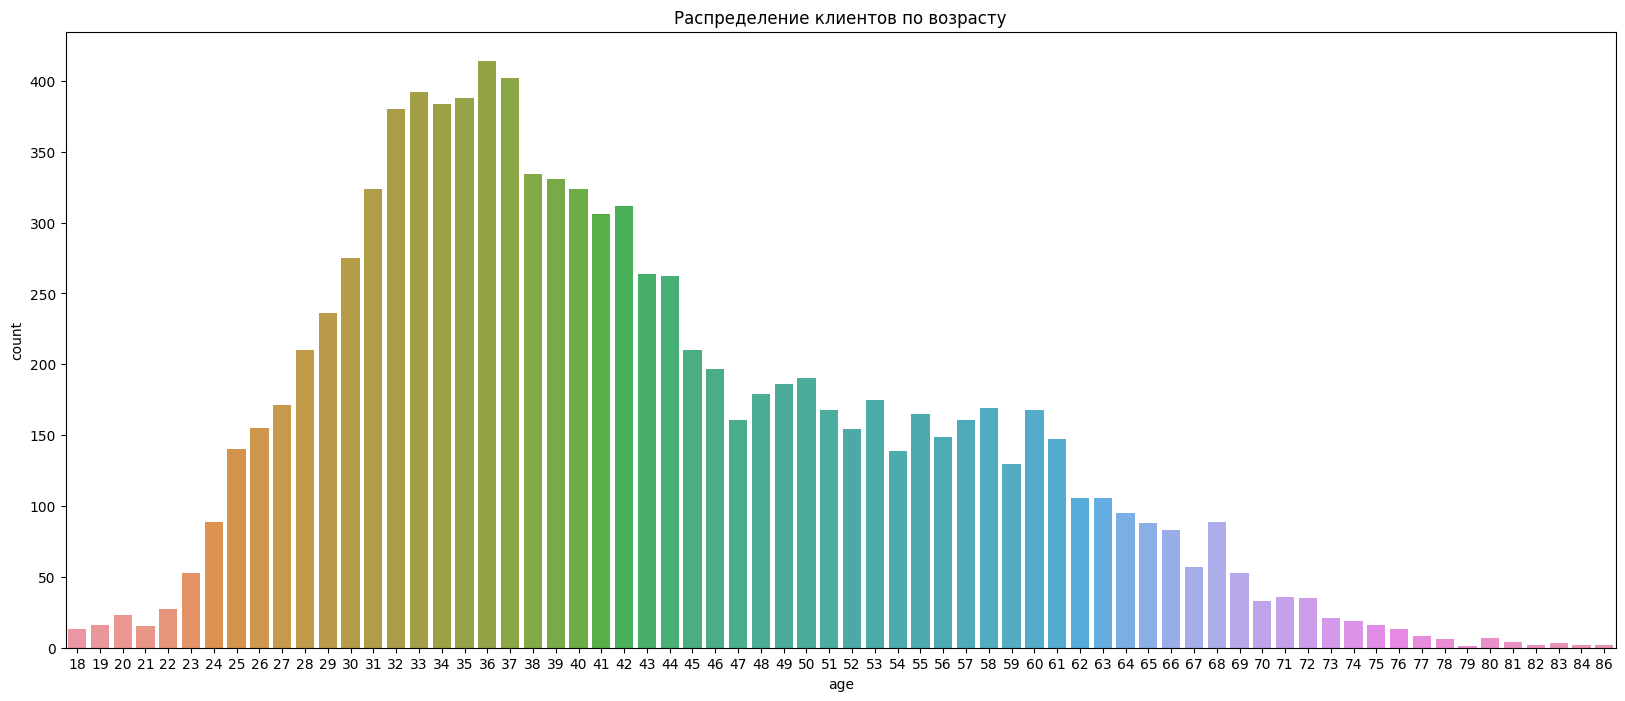

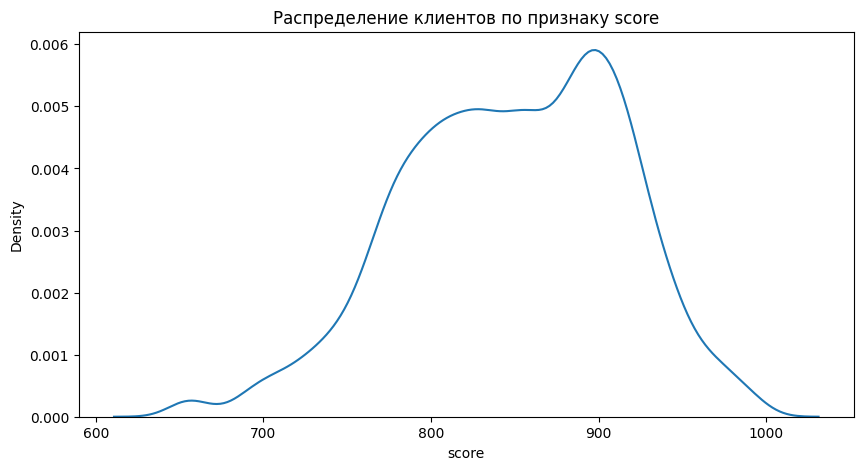

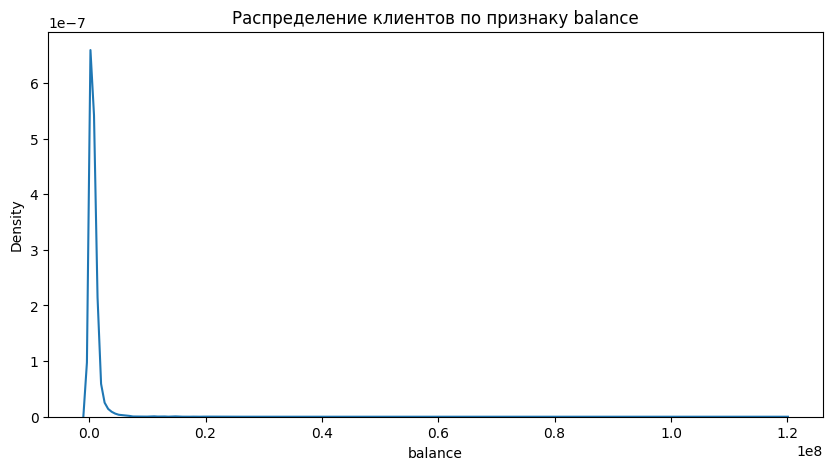

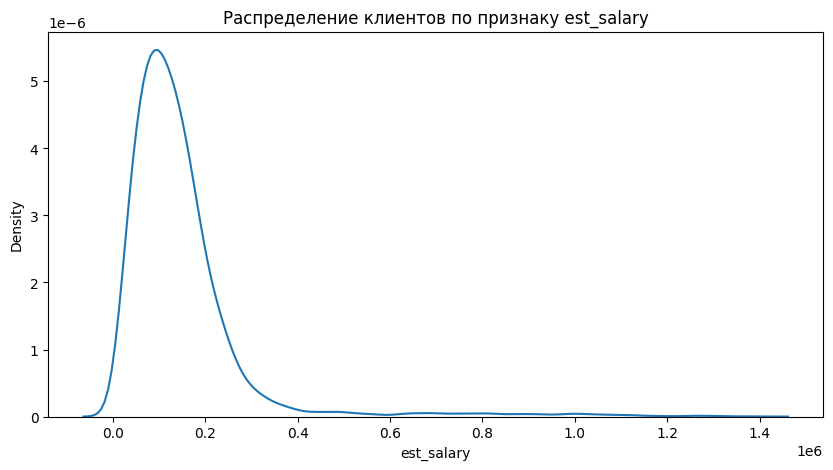

In [24]:
charts(data, hue=None) 

Наибольшее количество клиентов банка находится в отделении, расположенном в Ярославле - 5875 (59% от общего количества). Далее по убыванию количества клиентов идет отделение в Рыбинске - 2682 (27%) и Ростове (14%).   
По данным можно составить достаточно обобщенный портрет клиента банка: одинаковое количество женщин и мужчин, средний возраст 42 года, средний кредитный рейтинг - 848. Среднее количество баллов собственности составляет 2-3. Среднестатистический клиент банка пользуется 1-2 банковскими продуктами, в том числе кредитной картой (в 68% случаев).  
Среднее медианное значение дохода составляет около 120 тыс.ед., средний остаток на счете - около 520 тыс.ед.  
Клиент скорее активный (по медиане показателя лояльности), доля активных составляет 52%. Вероятность ухода клиента составляет 18%.

## Оценка корреляции признаков клиентов <a id="analysis32"></a>

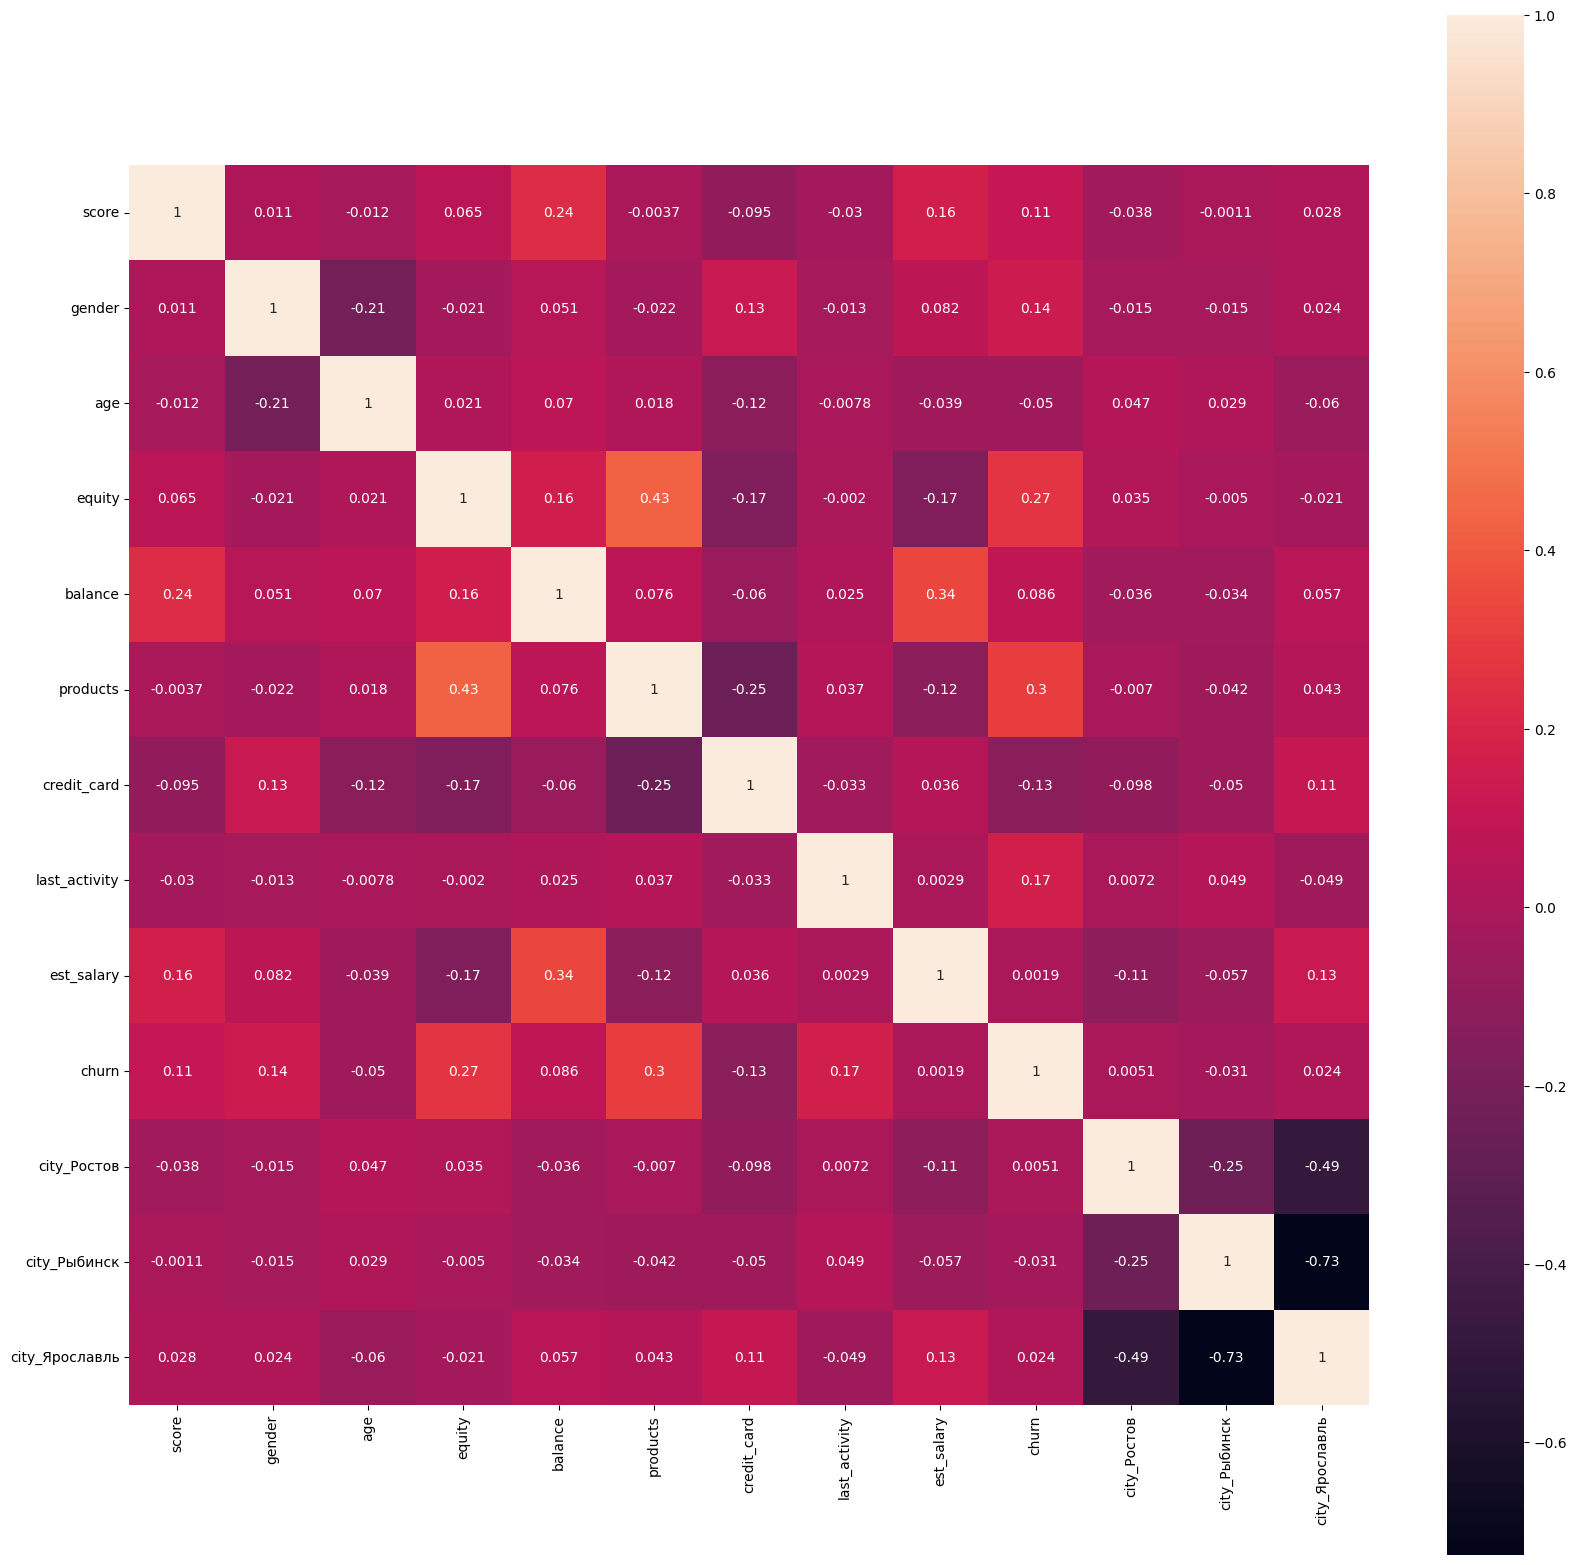

In [25]:
warnings.filterwarnings('ignore')
# матрица корреляций
corr_matrix = data.drop('user_id', axis=1).corr()

# тепловая карта для матрицы корреляций
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, square=True)
plt.show()

Корреляция между значениями признаков клиентов банка достаточно слабая.  
Наибольший уровень корреляции (0,43) наблюдается между количеством банковских продуктов и оценкой в баллах собственности. Также имеется зависимость между доходом и балансом на счете (0,34).  
С признаком оттока клиентов больше всего коррелируют признаки количества продуктов (0,3) и количество баллов собственности (0,27).

## Распределение клиентов по признаку оттока <a id="analysis33"></a>

In [26]:
# сгруппируем данные по признаку сетевого либо несетевого заведения
data_churn = data.pivot_table(index='churn', values = 'user_id', aggfunc='count')\
.rename(columns={'user_id':'churn_count'}).sort_values(by='churn_count', ascending=False)
data_churn.reset_index(inplace=True)
data_churn['churn_share'] = data_churn['churn_count'] / data_churn['churn_count'].sum()
data_churn['churn_share'] = data_churn['churn_share'].apply('{:.2%}'.format)
data_churn

,churn,churn_count,churn_share
0,0,8155,81.77%
1,1,1818,18.23%


Text(0.5, 1.0, 'Доля клиентов по признаку оттока')

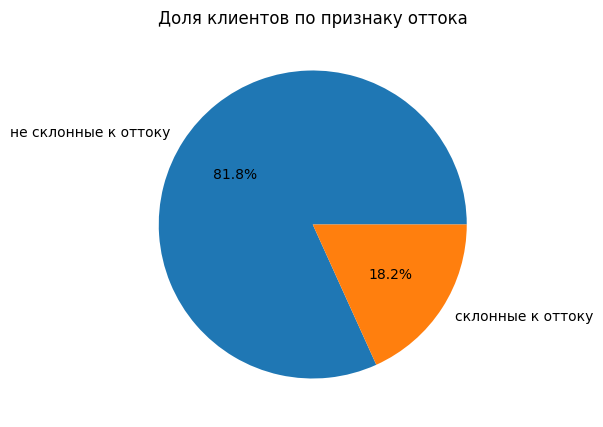

In [27]:
# построим диаграмму, показывающие долю клиентов, склонных и не склонных к оттоку
plt.figure(figsize=(5,5))
labels = ['не склонные к оттоку', 'склонные к оттоку'] 
plt.pie(data_churn['churn_count'], labels = labels, autopct='%.1f%%')
plt.title('Доля клиентов по признаку оттока')

Доля клиентов, склонных к оттоку, составляет 18,2% от общего количества клиентов.

In [28]:
# сгруппируем клиентов по признаку оттока
data.groupby('churn')['score','gender', 'age', 'equity', 'balance', 'products', 'credit_card',
'last_activity', 'est_salary', 'city_Ростов', 'city_Рыбинск', 'city_Ярославль', 'churn'].agg(['mean', 'median', 'count']).T

churn                          0            1
score          mean       845.40       863.36
               median     848.00       866.00
               count    8,155.00     1,818.00
gender         mean         0.47         0.65
               median       0.00         1.00
               count    8,155.00     1,818.00
age            mean        43.02        41.43
               median      40.00        39.00
               count    8,155.00     1,818.00
equity         mean         2.38         3.76
               median       3.00         4.00
               count    8,155.00     1,818.00
balance        mean   733,031.63 1,134,458.21
               median 475,410.09   783,908.90
               count    5,889.00     1,806.00
products       mean         1.76         2.38
               median       2.00         2.00
               count    8,155.00     1,818.00
credit_card    mean         0.71         0.55
               median       1.00         1.00
               count    8,155.00     1,818.00
last_activity  mean         0.48         0.70
               median       0.00         1.00
               count    8,155.00     1,818.00
est_salary     mean   147,674.64   148,357.48
               median 118,227.60   125,408.88
               count    8,155.00     1,818.00
city_Ростов    mean         0.14         0.15
               median       0.00         0.00
               count    8,155.00     1,818.00
city_Рыбинск   mean         0.28         0.24
               median       0.00         0.00
               count    8,155.00     1,818.00
city_Ярославль mean         0.58         0.61
               median       1.00         1.00
               count    8,155.00     1,818.00
churn          mean         0.00         1.00
               median       0.00         1.00
               count    8,155.00     1,818.00

В таблице средних значений показателей по признаку оттока, что среди клиентов, которые склонны к оттоку, больше мужчин.  
Средний баланс на счете таких клиентов больше по сравнению с показателем для клиентов, не планирующих уходить.   
Количество баллов собственности и количество продуктов у клиентов, склонных к оттоку, больше. При этом доля тех из них, у кого имеется кредитная карта, меньше.  
Доля активных клиентов среди тех, кто планирует уйти из банка, выше (0,70 против 0,48).  
Кредитный рейтинг, возраст, уровень дохода у двух групп отличаются незначительно.

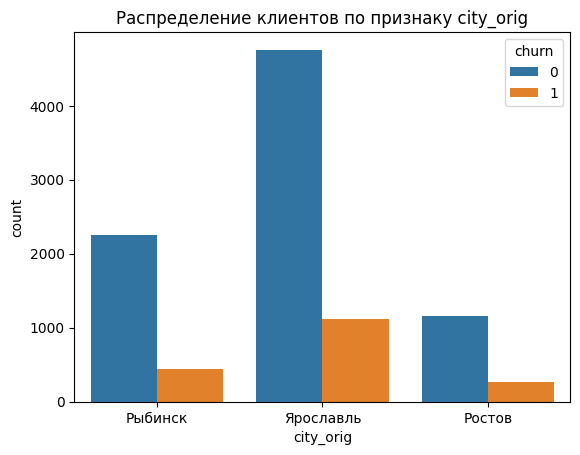

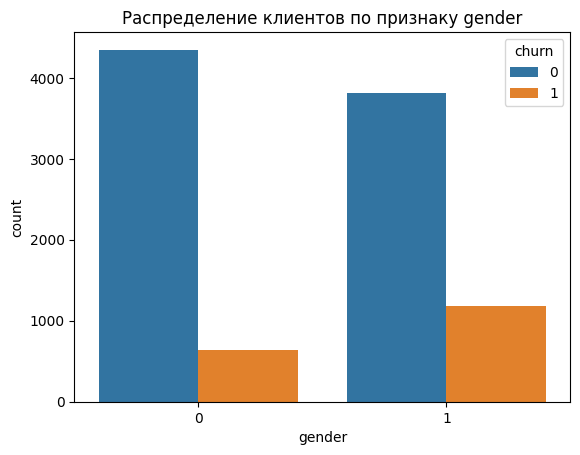

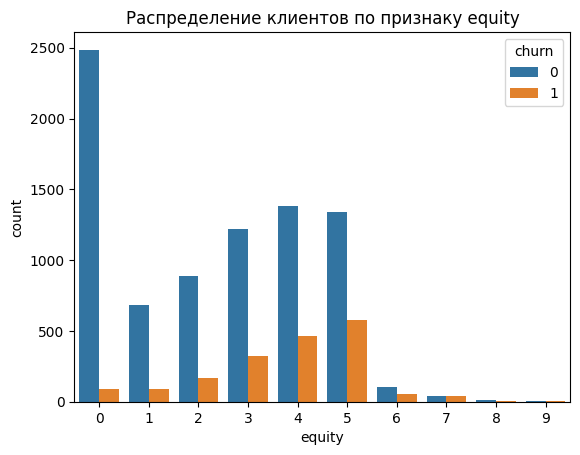

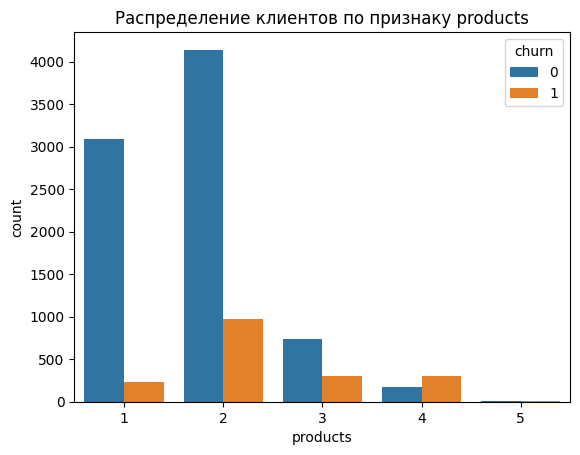

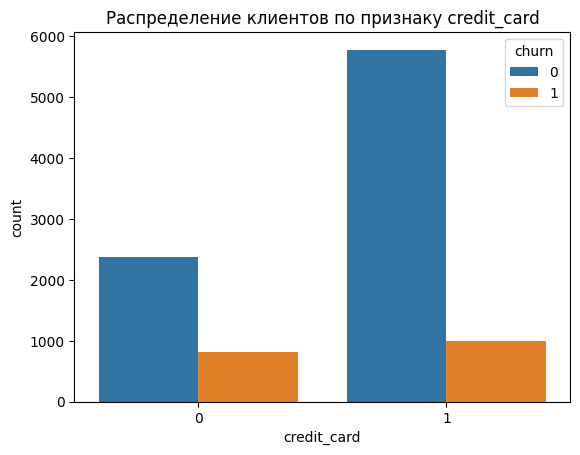

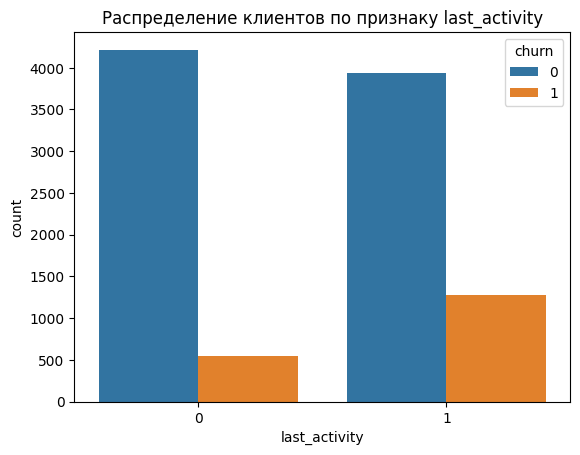

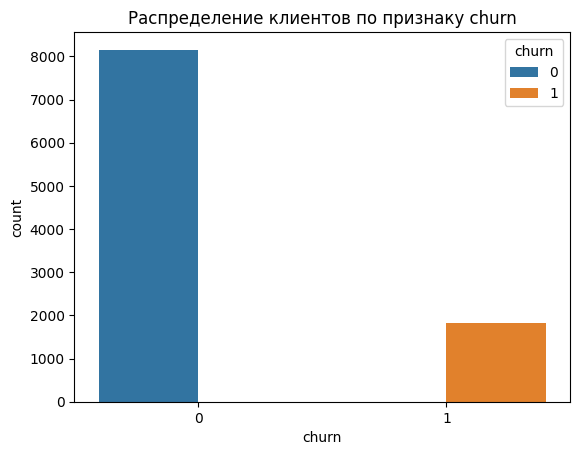

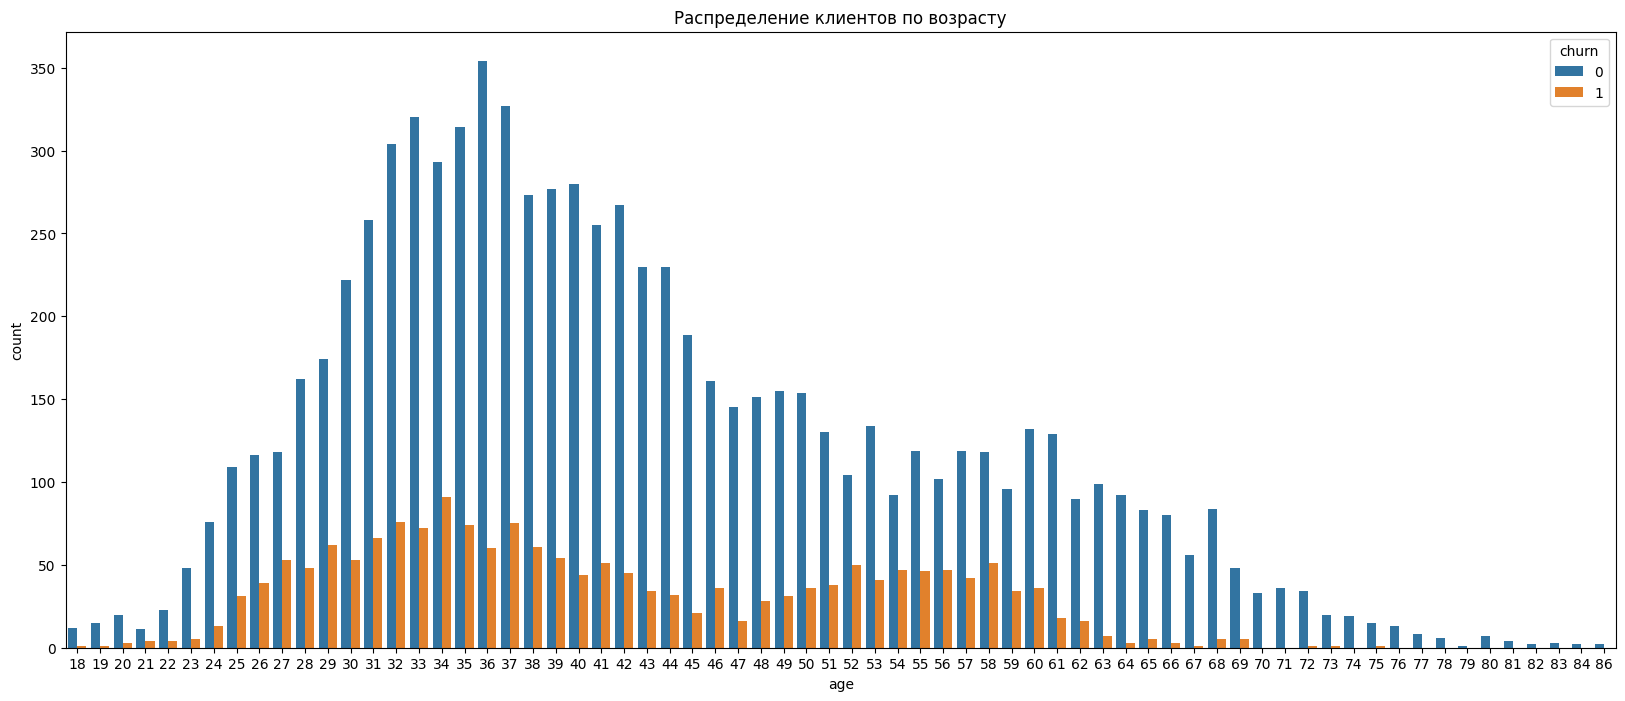

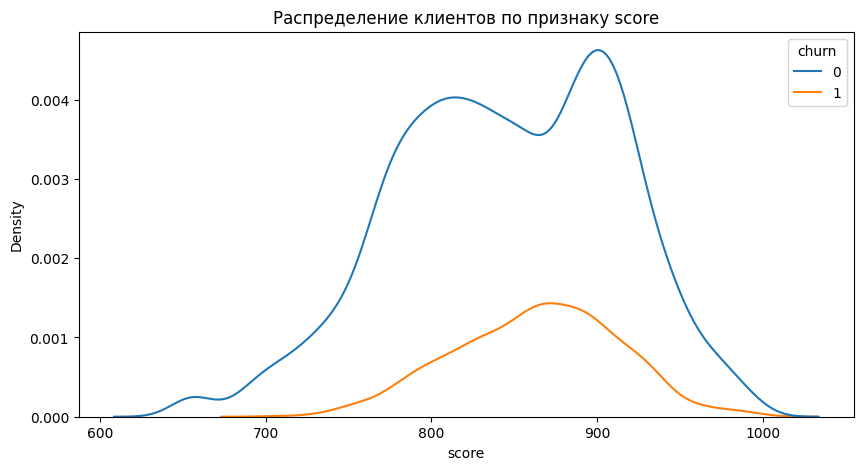

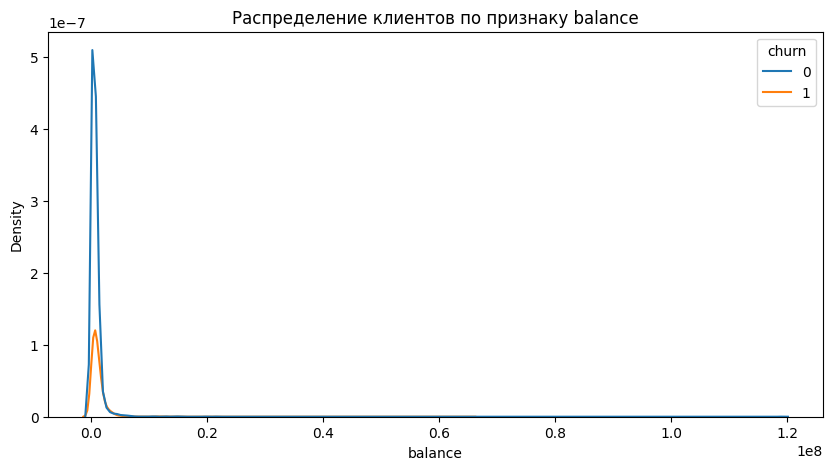

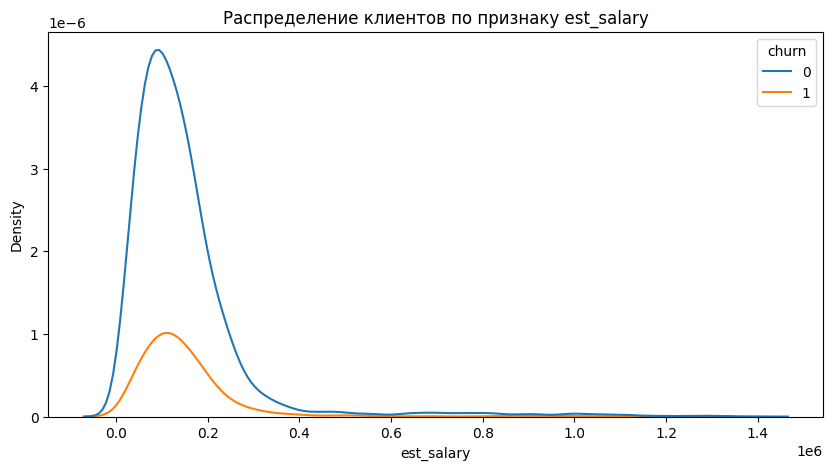

In [29]:
charts(data, hue='churn')   

Наибольшая доля клиентов, склонных к оттоку, обслуживается в отделении банка, расположенном в Ярославле - 61% от общего количества таких клиентов. В остальных двух отделениях доля меньше - 24% в Рыбинске, 15% в Ростове.  Мужчины более склонны к уходу как в абсолютном, так и в относительном выражении. Пользователи кредитных карт более склонны к уходу по сравнению с клиентами, не имеющим карт.  
Клиенты, которые пользуются двумя продуктами - самая многочисленная группа по количеству наиболее лояльных банку клиентов. При этом количество клиентов данной категории, склонных к оттоку, также самое большое. Тех, кто пользуется одним продуктом, немногим меньше, но доля оттока у них больше. При росте количества продуктов увеличивается доля тех клиентов в общем объеме клиентов, пользующихся данным количеством продуктов, у кого есть склонность к оттоку. Среди клиентов, пользующихся 4-мя продуктами, количество склонных к оттоку клиентов превышает количество лояльных банку клиентов.  
Средний возраст всех клиентов банка составляет около 42 лет. При этом средний возраст клиентов, склонных к оттоку немного ниже среднего возраста лояльных клиентов (41 против 43 лет). Наиболее склонны к оттоку лица 29-38 лет.  
Кредитный рейтинг клиентов, склонных к оттоку, немного превышает показатель для лояльных клиентов (863 против 845 баллов).  Среднее значения количества баллов собственности и баланса на счете в группе клиентов, склонных к оттоку, превышают средние значения показателей для лояльных клиентов. Средний уровень заработной платы в данных группах примерно одинаковый (148 тыс.ед.).

## Категоризация клиентов, склонных к оттоку, по отдельным признакам <a id="analysis34"></a>

<function matplotlib.pyplot.show(close=None, block=None)>

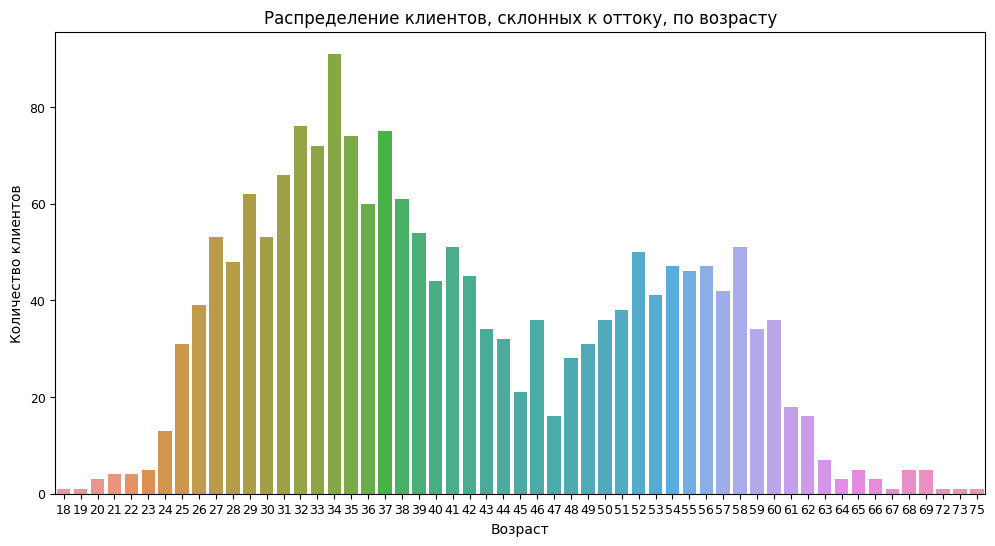

In [30]:
# построим график распределения клиентов, склонных к оттоку, по возрасту
plt.figure(figsize=(12,6))
ax = sns.countplot(data=data.query('churn == 1'), x='age')
ax.set_xlabel('Возраст')
ax.set_ylabel('Количество клиентов')
ax.set_title('Распределение клиентов, склонных к оттоку, по возрасту')
ax.tick_params(labelsize=9)
plt.show

Средний возраст клиентов, склонных к оттоку, составляет 41 год. При этом наибольшее количество таких клиентов находятся в возрастной группе от 27 до 42 лет. Произведем категоризацию клиентов по возрасту в соответствии со следующими параметрами:  группа 1 - с 18 до 26 лет включительно, группа 2 - с 27 до 42 лет включительно, группа 3 - с 43 до 50 лет включительно, группа 4 - с 51 до 60 лет включительно, группа 5 - 61 год и старше.

In [31]:
data['age_category'] = pd.cut(data['age'], [17.9, 26.9, 42.9, 50.9, 60.9, np.inf], labels=[1,2,3,4,5])

<function matplotlib.pyplot.show(close=None, block=None)>

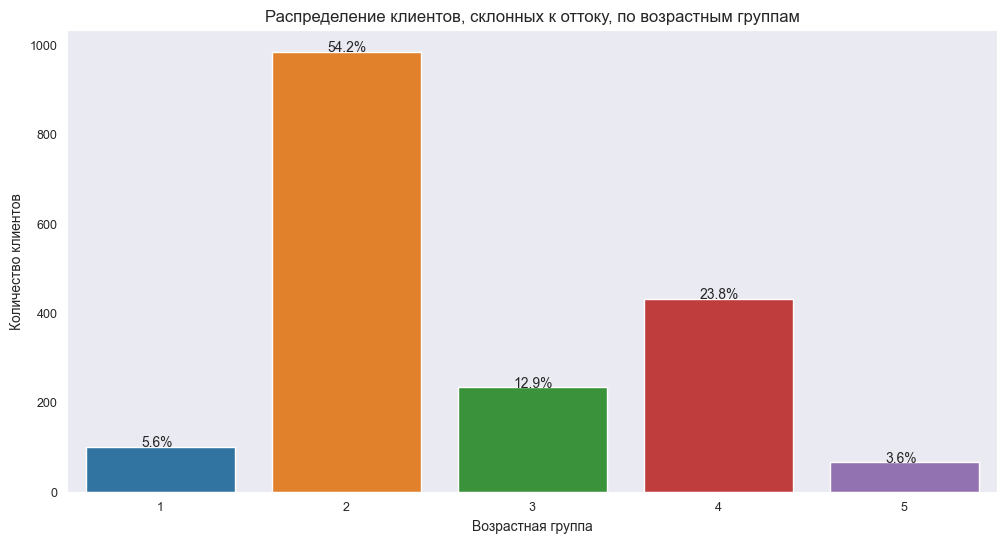

In [32]:
sns.set_style('dark')
# создадим функцию для построения графика с долями  
def share_graph(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.1
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 10)
# построим график распределения клиентов, склонных к оттоку, по возрастным группам
plt.figure(figsize=(12,6))
ax = sns.countplot(data=data.query('churn == 1'), x='age_category')
ax.set_xlabel('Возрастная группа')
ax.set_ylabel('Количество клиентов')
ax.set_title('Распределение клиентов, склонных к оттоку, по возрастным группам')
ax.tick_params(labelsize=9)
share_graph(ax, data.query('churn == 1').age_category)
plt.show

Самой многочисленной возрастной группой клиентов, склонных к оттоку, является группа от 27 до 42 лет включительно (54,2% от общего количества клиентов, склонных к оттоку). Второй по численности является группа с 51 до 60 лет включительно (23,7%).

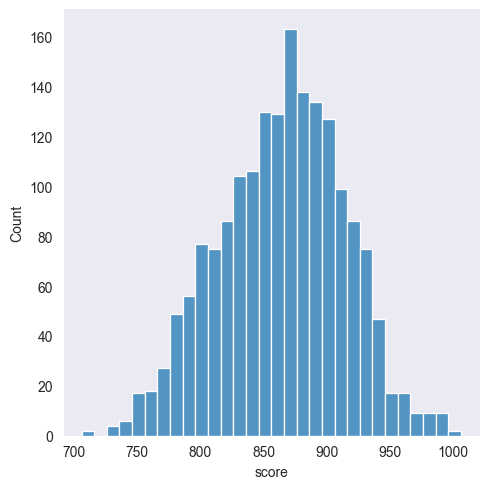

In [33]:
# построим график распределения клиентов, склонных к оттоку, по кредитному рейтингу
sns.displot(data=data.query('churn == 1'), x='score', binwidth=10)

Средний кредитный рейтинг клиентов, склонных к оттоку, составляет 863 балла. При этом наибольшее количество таких клиентов имеют рейтинг от 800 до 930. Произведем категоризацию клиентов по кредитному рейтингу в соответствии со следующими параметрами:  группа 1 - рейтинг от 700 до 800 баллов включительно, группа 2 - от 801 до 930 баллов включительно, группа 3 - от 931 до 1000 баллов включительно.

In [34]:
data['score_category'] = pd.cut(data['score'], [700, 800.5, 930.5, np.inf], labels=[1,2,3])

<function matplotlib.pyplot.show(close=None, block=None)>

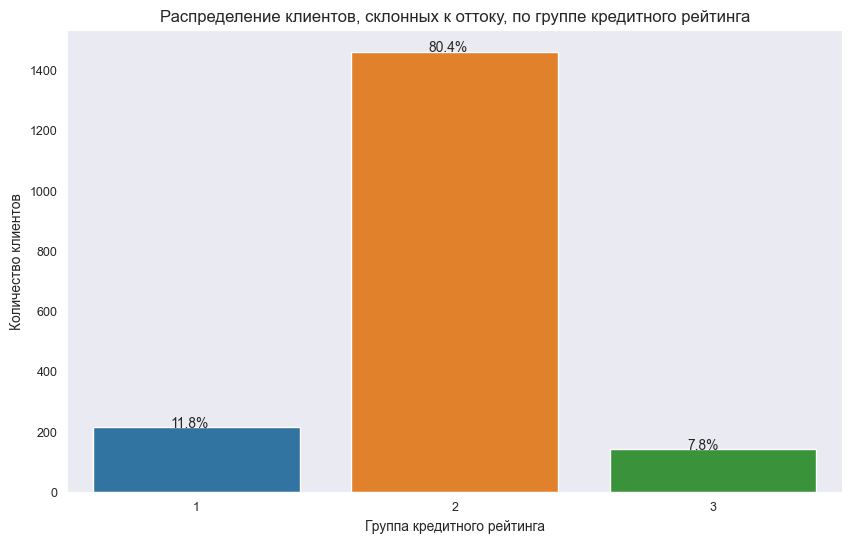

In [35]:
# построим график распределения клиентов, склонных к оттоку, по группам кредитного рейтинга
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data.query('churn == 1'), x='score_category')
ax.set_xlabel('Группа кредитного рейтинга')
ax.set_ylabel('Количество клиентов')
ax.set_title('Распределение клиентов, склонных к оттоку, по группе кредитного рейтинга')
ax.tick_params(labelsize=9)
share_graph(ax, data.query('churn == 1').score_category)
plt.show

Самой многочисленной группой клиентов, склонных к оттоку, является группа с кредитным рейтингом от 801 до 930 баллов включительно (80,3% от общего количества клиентов, склонных к оттоку).

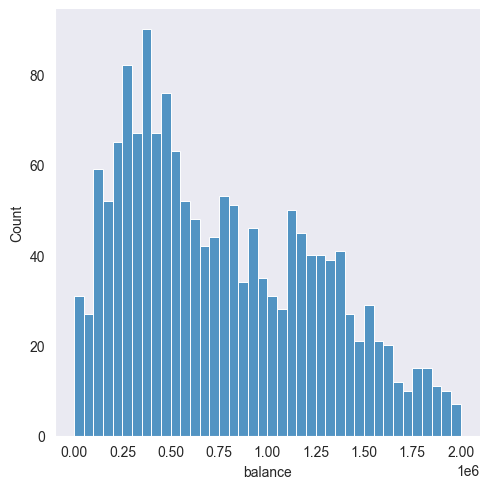

In [36]:
# построим график распределения клиентов, склонных к оттоку, по балансу на счете
sns.displot(data=data.query('churn == 1 and balance < 2000000'), x='balance', binwidth=50000)

Среднее значение баланса на счете у клиентов, склонных к оттоку, составляет 827 тыс.ед., медианное значение - 524 тыс.ед. (из-за наличия небольшого количества клиентов, имеющих баланс счета более 1500 тыс.ед.).  
Наибольшая часть клиентов имеет баланс от 100 до 800 тыс.ед. Произведем категоризацию клиентов по балансу счета в соответствии со следующими параметрами:  группа 1 - баланс от 0 до 100000 ед. включительно, группа 2 - от 100000.01 до 1400000 ед. включительно, группа 3 - от 1400000.01 ед. и выше.

In [37]:
data['balance_category'] = pd.cut(data['balance'], [0, 100000, 1400000, np.inf], labels=[1,2,3])

<function matplotlib.pyplot.show(close=None, block=None)>

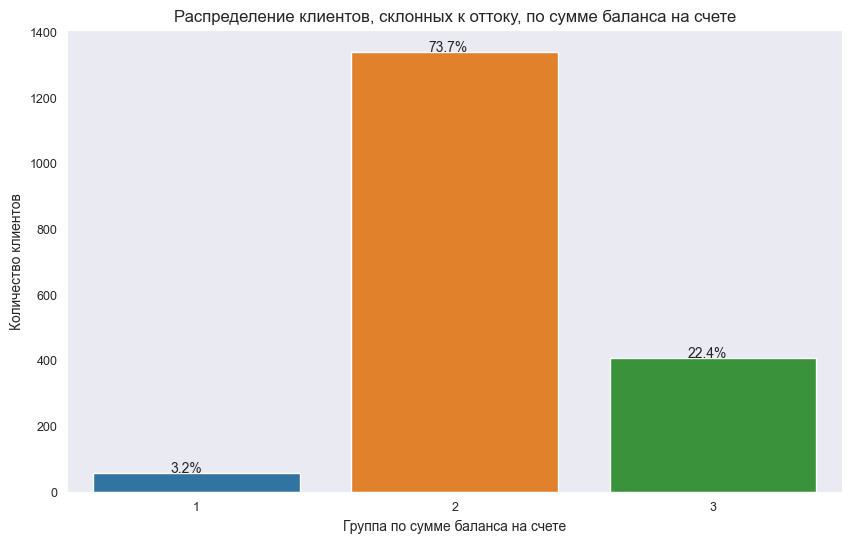

In [38]:
# построим график распределения клиентов, склонных к оттоку, по группам суммы баланса на счете
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data.query('churn == 1'), x='balance_category')
ax.set_xlabel('Группа по сумме баланса на счете')
ax.set_ylabel('Количество клиентов')
ax.set_title('Распределение клиентов, склонных к оттоку, по сумме баланса на счете')
ax.tick_params(labelsize=9)
share_graph(ax, data.query('churn == 1').balance_category)
plt.show

Самой многочисленной группой клиентов, склонных к оттоку, является группа с балансом на счете от 100 до 1400 тыс.ед. включительно (73,7% от общего количества клиентов, склонных к оттоку).

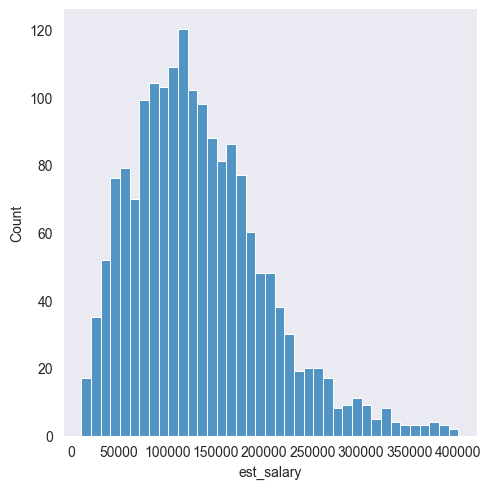

In [39]:
# построим график распределения клиентов, склонных к оттоку, по уровню дохода
sns.displot(data=data.query('churn == 1 and est_salary <400000'), x='est_salary', binwidth=10000)

Средняя величина заработной платы у клиентов, склонных к оттоку, составляет 147 тыс.ед., медианное значение показателя - 119 тыс.ед. (из-за наличия небольшого количества клиентов, имеющих высокий уровень доходов).  
Наибольшая часть клиентов имеет доход от 35 до 180 тыс.ед. Произведем категоризацию клиентов по уровню заработной платы в соответствии со следующими параметрами:  группа 1 - заработная плата от 0 до 35000 ед. включительно, группа 2 - от 35000.01 до 180000 ед. включительно, группа 3 - от 180000.01 ед. и выше.

In [40]:
data['est_salary_category'] = pd.cut(data['est_salary'], [0, 35000, 180000, np.inf], labels=[1,2,3])

<function matplotlib.pyplot.show(close=None, block=None)>

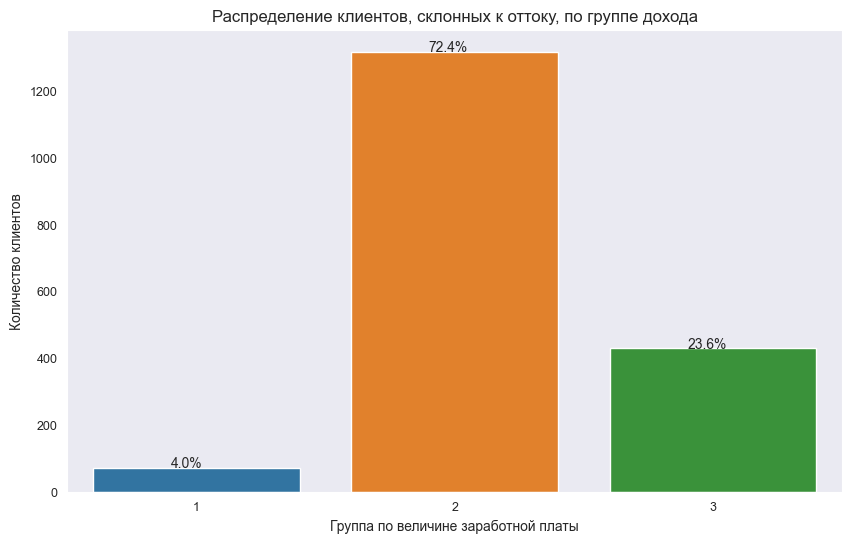

In [41]:
# построим график распределения клиентов, склонных к оттоку, по группам суммы баланса на счете
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data.query('churn == 1'), x='est_salary_category')
ax.set_xlabel('Группа по величине заработной платы')
ax.set_ylabel('Количество клиентов')
ax.set_title('Распределение клиентов, склонных к оттоку, по группе дохода')
ax.tick_params(labelsize=9)
share_graph(ax, data.query('churn == 1').est_salary_category)
plt.show

Самой многочисленной группой клиентов, склонных к оттоку, является группа с величиной заработной платы от 35 до 180 тыс.ед. (72,4% от общего количества клиентов, склонных к оттоку).    
Произведена категоризация клиентов, склонных к оттоку, по следующим признакам - возрасту, кредитному рейтингу, сумме баланса на счете, величине заработной платы. В результате получены группы клиентов по указанным признакам. Наиболее многочисленные группы имеют долю от 54% до 80% в общем объеме клиентов, склонных к оттоку. Указанные категории будут использованы при осуществлении в дальнейшем сегментации данных клиентов.

# Проверка статистических гипотез <a id="testing4"></a>

## Проверка гипотезы о различии между доходами клиентов, склонных к оттоку  и доходами клиентов, кто не планирует уходить <a id="testing41"></a>

Сформулируем гипотезы:  
Нулевая гипотеза (Н0): статистически значимых различий между доходами клиентов, склонных к оттоку и доходами клиентов, кто не планирует уходить, нет.  
Альтернативная гипотеза (Н1): статистически значимые различия между доходами клиентов, склонных к оттоку и доходами клиентов, кто не планирует уходить, есть.

In [42]:
# cформируем выборки доходов клиентов, склонных к оттоку и клиентов, кто не планирует уходить
est_salary_0 = data.query('churn == 0')['est_salary']
est_salary_1 = data.query('churn == 1')['est_salary']

In [43]:
# сравним размеры выборок
print('Количество пользователей, которые не планируют уходить:', est_salary_0.shape[0])
print('Количество пользователей, склонных к оттоку:', est_salary_1.shape[0])
print(f'Разница в размерах выборок: {est_salary_0.shape[0]/est_salary_1.shape[0]-1:.1%}')
print(f'Отклонение средних значений выборок: {est_salary_0.mean() / est_salary_1.mean()-1:.1%}')
print(f'Отклонение средних значений выборок: {est_salary_0.mean() / est_salary_1.mean()-1:.1%}')

Количество пользователей, которые не планируют уходить: 8155
Количество пользователей, склонных к оттоку: 1818
Разница в размерах выборок: 348.6%
Отклонение средних значений выборок: -0.5%
Отклонение средних значений выборок: -0.5%


Распределение заработной платы клиентов по признаку оттока


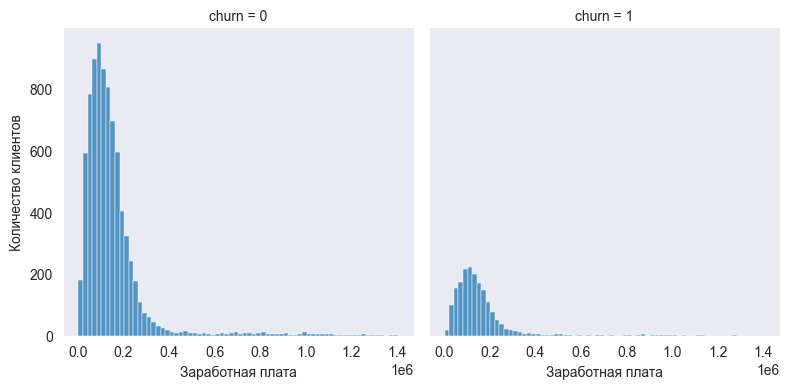

In [44]:
# рассмотрим распределение доходов по группам клиентов
print('Распределение заработной платы клиентов по признаку оттока')
sns.displot(data = data, x="est_salary",  col='churn', height=4, binwidth=20000, facet_kws=dict(margin_titles=True))\
.set(xlabel="Заработная плата", ylabel="Количество клиентов")

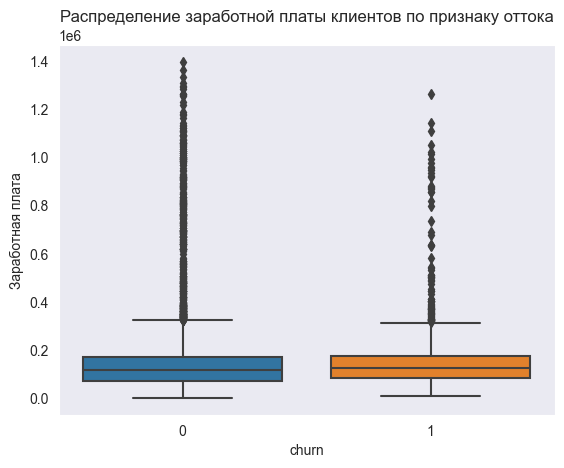

In [45]:
sns.boxplot(y='est_salary', data=data, x='churn')\
.set(title="Распределение заработной платы клиентов по признаку оттока", ylabel="Заработная плата");

Выборки данных удовлетворяют следующим условиям: совокупности не зависят друг от друга, выборочные средние нормально распределены, дисперсии рассматриваемых совокупностей примерно равны. Это позволяет применить для проверки гипотезы t-тест.  
В связи с достаточно высокой численностью исследуемых групп, уровень статистической значимости примем равным 0,01.

In [46]:
# уровень статистической значимости
alpha = 0.01

# если p-value окажется меньше него, отвергнем гипотезу
results = st.ttest_ind(est_salary_0, est_salary_1)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.8500882387258035
Не получилось отвергнуть нулевую гипотезу


Значение p-value значительно превышает уровень критической значимости (0.01). Нулевая гипотеза не отвергнута, статистически значимых различий между доходами клиентов, склонных к оттоку и доходами клиентов, кто не планирует уходить, нет. Соответственно нет оснований считать, что имеются различия между группами.

## Проверка гипотезы о различии между кредитными рейтингами клиентов, склонных к оттоку и клиентов, кто не планирует уходить <a id="testing42"></a>

Сформулируем гипотезы:  
Нулевая гипотеза (Н0): статистически значимых различий между кредитными рейтингами клиентов, склонных к оттоку и кредитными рейтингами клиентов, кто не планирует уходить, нет.  
Альтернативная гипотеза (Н1): статистически значимые различия между кредитными рейтингами клиентов, склонных к оттоку и кредитными рейтингами клиентов, кто не планирует уходить, есть.

In [47]:
# cформируем выборки доходов клиентов, склонных к оттоку и клиентов, кто не планирует уходить
score_0 = data.query('churn == 0')['score']
score_1 = data.query('churn == 1')['score']

In [48]:
# сравним размеры выборок
print('Количество пользователей, которые не планируют уходить:', score_0.shape[0])
print('Количество пользователей, склонных к оттоку:', score_1.shape[0])
print(f'Разница в размерах выборок: {score_0.shape[0]/score_1.shape[0]-1:.1%}')
print(f'Отклонение средних значений выборок: {score_0.mean() / score_1.mean()-1:.1%}')
print(f'Отклонение средних значений выборок: {score_0.mean() / score_1.mean()-1:.1%}')

Количество пользователей, которые не планируют уходить: 8155
Количество пользователей, склонных к оттоку: 1818
Разница в размерах выборок: 348.6%
Отклонение средних значений выборок: -2.1%
Отклонение средних значений выборок: -2.1%


Распределение кредитных рейтингов клиентов по признаку оттока


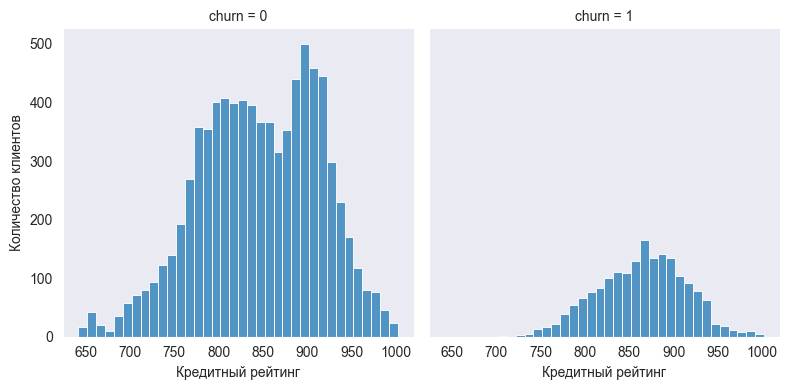

In [49]:
# рассмотрим распределение доходов по группам клиентов
print('Распределение кредитных рейтингов клиентов по признаку оттока')
sns.displot(data = data, x="score",  col='churn', height=4, binwidth=10, facet_kws=dict(margin_titles=True))\
.set(xlabel="Кредитный рейтинг", ylabel="Количество клиентов")

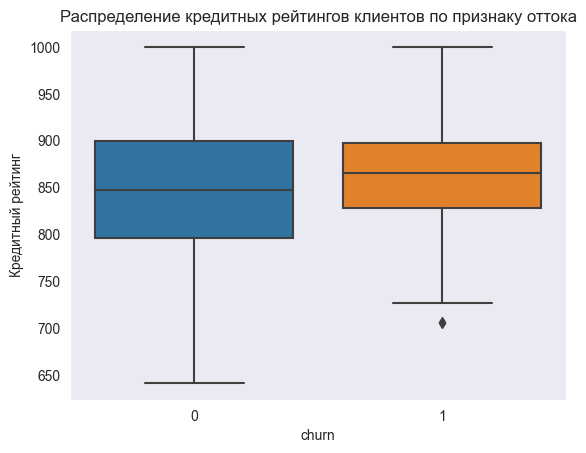

In [50]:
sns.boxplot(y='score', data=data, x='churn')\
.set(title="Распределение кредитных рейтингов клиентов по признаку оттока", ylabel="Кредитный рейтинг");

Выборки данных удовлетворяют следующим условиям: совокупности не зависят друг от друга, выборочные средние нормально распределены, дисперсии рассматриваемых совокупностей примерно равны. Это позволяет применить для проверки гипотезы t-тест.

In [51]:
# уровень статистической значимости
alpha = 0.01

# если p-value окажется меньше него, отвергнем гипотезу
results = st.ttest_ind(score_0, score_1)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.3562886531110081e-26
Отвергаем нулевую гипотезу


Значение p-value значительно ниже уровня критической значимости (0.01). Нулевая гипотеза отвергнута, статистически значимые различия между кредитными рейтингами клиентов, склонных к оттоку и кредитными рейтингами клиентов, кто не планирует уходить, есть. Соответственно есть основания считать, что имеются различия между группами.

Вывод:  
Мы провели проверку двух гипотез с применением t-теста. В связи с достаточно высокой численностью исследуемых групп, уровень статистической значимости принят равным 0,01.  
Первая гипотеза:  
Нулевая гипотеза (Н0): статистически значимых различий между доходами клиентов, склонных к оттоку и доходами клиентов, кто не планирует уходить, нет.  
Альтернативная гипотеза (Н1): статистически значимые различия между доходами клиентов, склонных к оттоку и доходами клиентов, кто не планирует уходить, есть.  
По итогам проверки нулевая гипотеза не отвергнута, статистически значимых различий между доходами клиентов, склонных к оттоку и доходами клиентов, кто не планирует уходить, нет. Соответственно нет оснований считать, что имеются различия между группами.  
Вторая гипотеза:  
Нулевая гипотеза (Н0): статистически значимых различий между кредитными рейтингами клиентов, склонных к оттоку и кредитными рейтингами клиентов, кто не планирует уходить, нет.  
Альтернативная гипотеза (Н1): статистически значимые различия между кредитными рейтингами клиентов, склонных к оттоку и кредитными рейтингами клиентов, кто не планирует уходить, есть.  
По итогам проверки нулевая гипотеза отвергнута, статистически значимые различия между кредитными рейтингами клиентов, склонных к оттоку и кредитными рейтингами клиентов, кто не планирует уходить, есть. Соответственно есть основания считать, что имеются различия между группами.

# Сегментация клиентов банка по признаку оттока <a id="segmentation5"></a>

По итогам анализа были выявлены факторы, которые влияют на отток клиентов банка.  
Наибольшая доля клиентов, склонных к оттоку, обслуживается в отделении банка, расположенном в Ярославле - 61% от общего количества таких клиентов. В остальных двух отделениях доля меньше - 24% в Рыбинске, 15% в Ростове.  
Мужчины более склонны к уходу как в абсолютном, так и в относительном выражении. Пользователи кредитных карт более склонны к уходу по сравнению с клиентами, не имеющим карт.  
Наиболее лояльными являются клиенты, пользующиеся одним банковским продуктом. Клиенты, которые пользуются двумя продуктами - самая многочисленная группа по количеству наиболее лояльных банку клиентов. При этом количество клиентов данной категории, склонных к оттоку, также самое большое. При росте количества продуктов увеличивается доля тех клиентов в общем объеме клиентов, пользующихся данным количеством продуктов, у кого есть склонность к оттоку. Среди клиентов, пользующихся 4-мя продуктами, количество склонных к оттоку клиентов превышает количество лояльных банку клиентов.  
Средний возраст клиентов, склонных к оттоку немного ниже среднего возраста лояльных клиентов (41 против 43 лет). Наиболее склонны к оттоку лица 29-38 лет.  
Средний кредитный рейтинг клиентов, склонных к оттоку, немного превышает показатель для лояльных клиентов (863 против 845 баллов).  
Среднее значения количества баллов собственности и баланса на счете в группе клиентов, склонных к оттоку, превышают средние значения показателей для лояльных клиентов. Средний уровень заработной платы в данных группах примерно одинаковый.  
Корреляция между значениями признака оттока и прочих признаков клиентов банка достаточно слабая.  
С признаком оттока клиентов больше всего коррелируют признаки количества продуктов (0,3) и количество баллов собственности (0,27).

Произведем сегментацию клиентов банка по разным признакам: полу, возрасту, городу, в котором находится отделение банка, кредитному рейтингу (по итогам проверки гипотезы об отсутствии статистически значимых различий между кредитными рейтингами клиентов, склонных к оттоку и кредитными рейтингами клиентов, кто не планирует уходить, нулевая гипотеза отвергнута. В связи с чем есть основания считать, что имеются различия между группами клиентов.)

In [52]:
# сегментация клиентов
segment = []
columns = ['gender', 'age_category' , 'city_orig', 'score_category', 'user_count', 'churn_user_count', 'churn_user_count_share']
for i in data['gender'].unique():
    for j in data['age_category'].unique():
        for k in data['city_orig'].unique():
            for l in data['score_category'].unique():
                m = data.query('gender==@i and age_category == @j and city_orig == @k and score_category == @l')['user_id'].count()
                n = data.query('churn ==1 and gender==@i and age_category == @j and city_orig == @k and score_category == @l')['user_id'].count()
                o = n/m
                x = [i, j, k, l, m, n, o]
                segment.append(x)
data_segment = pd.DataFrame (data = segment, columns = columns)
data_segment = data_segment.sort_values(by=['churn_user_count'], ascending=False)
data_segment.reset_index
data_segment.head(10)

,gender,age_category,city_orig,score_category,user_count,churn_user_count,churn_user_count_share
76,1,2,Ярославль,2.00,1145,332,0.29
16,0,2,Ярославль,2.00,901,189,0.21
72,1,2,Рыбинск,2.00,487,138,0.28
88,1,4,Ярославль,2.00,240,105,0.44
28,0,4,Ярославль,2.00,323,91,0.28
80,1,2,Ростов,2.00,255,69,0.27
112,1,3,Ярославль,2.00,325,65,0.20
24,0,4,Рыбинск,2.00,198,52,0.26
78,1,2,Ярославль,3.00,210,46,0.22
77,1,2,Ярославль,1.00,416,45,0.11


По итогам сегментации было выделено несколько сегментов клиентов. Наиболее многочисленные сегменты включают в себя мужчин и женщин в возрастной группе от 27 до 42 лет, с кредитным рейтингом от 801 до 930, которые являются клиентами отделения банка в Ярославле (1145 и 901 чел. соответственно). В группе, состоящей из мужчин, доля клиентов, склонных к оттоку, составила 29%, в женской группе - 21%.  
Третий по численности сегмент представлен мужчинами, которые являются клиентами банка в Рыбинске, с теми же параметрами, которыми обладают мужчины - клиенты банка в г.Ярославль. Доля в этом сегменте клиентов, склонных к оттоку, составляет 28%.  
В остальных сегментах количество клиентов меньше 250 человек.  
Рассмотрим более подробно самые крупные сегменты, в которые входят мужчины и женщины, являющиеся клиентами банка в г.Ярославль.

In [53]:
# выберем значения параметров, использованных для разделения на сегменты и сгруппируем данные по полу и признаку оттока
data.query('city_orig == "Ярославль" and age_category == 2 and score_category == 2')\
.groupby(['gender', 'churn'])['equity', 'balance', 'products', 'credit_card','last_activity', 'est_salary']\
.agg(['mean', 'median', 'count']).T

gender                        0                     1             
churn                         0          1          0            1
equity        mean         2.79       4.12       2.27         4.00
              median       3.00       4.00       2.00         4.00
              count      712.00     189.00     813.00       332.00
balance       mean   617,360.18 922,726.90 707,456.31 1,056,491.88
              median 474,765.47 787,262.02 525,411.24   855,977.40
              count      555.00     189.00     519.00       332.00
products      mean         1.89       2.52       1.69         2.47
              median       2.00       2.00       2.00         2.00
              count      712.00     189.00     813.00       332.00
credit_card   mean         0.70       0.50       0.84         0.67
              median       1.00       1.00       1.00         1.00
              count      712.00     189.00     813.00       332.00
last_activity mean         0.39       0.92       0.40         0.66
              median       0.00       1.00       0.00         1.00
              count      712.00     189.00     813.00       332.00
est_salary    mean   143,321.22 160,100.94 165,480.65   156,417.19
              median 125,360.80 132,001.81 144,948.73   141,558.11
              count      712.00     189.00     813.00       332.00

Характеристики двух сегментов, в которые входят мужчины и женщины в возрастной группе от 27 до 42 лет, с кредитным рейтингом от 801 до 930, примерно одинаковы. По сравнению с более лояльными клиентами, которые не планируют прекращать сотрудничество с банком, клиенты данных сегментов выделяются следующими параметрами:  
Количество баллов собственности у клиентов сегментов выше, чем у лояльных клиентов: у мужчин в среднем 4 против 2,3 у лояльных клиентов (+73,9%), у женщин - 4,1 против 2,8 (+46,4%).  
Сумма баланса на счете у клиентов сегмента также превышает значения показателей у лояльных клиентов: у мужчин в среднем 1056 тыс.ед (на 49,3% больше по сравнению с показателем для лояльных клиентов), у женщин - в среднем 923 тыс.ед (на 49,5% больше по сравнению с показателем для лояльных клиентов).  
По признаку уровня заработной платы ситуация в мужском и женском сегментов отличается. В сегменте, состоящем из мужчин, средний уровень заработной платы меньше по сравнению со средним значением показателя у лояльных клиентов - 156 тыс.ед. против 165 тыс.ед. В сегменте, состоящем из женщин, средний уровень заработной платы, наоборот, выше - 160 тыс.ед. против 143 тыс.ед.  
Клиенты сегментов более активно пользуются банковскими продуктами: в группе мужчин и женщин в среднем 2,5 продукта, в группах лояльных клиентов средние значения показателя для мужчин и женщин составляют соответственно 1,7 и 1,9.  
При этом клиенты обоих сегментов менее активно пользуются кредитными картами: в сегменте, состоящем из мужчин, кредитная карта есть у 67% по сравнению с 84% в группе лояльных клиентов. В сегменте, состоящем из мужчин смитуация схожая - кредитные карты имеются у 50% по сравнению с 70% у лояльных клиентов.  
Клиенты сегментов более активны по сравнению с лояльными клиентами. Доля таких клиентов в мужском сегменте составляет 66% по сравнению с 40% у лояльных клиентов. В сегменте, состоящем из женщин, доля активных клиентов составляет 92%, что существенно выше, чем в группе лояльных клиентов (39%).

Можно сделать вывод, что клиенты сегментов, склонные к оттоку, являются более активными и чаще пользуются банковскими продуктами по сравнению с лояльными клиентами. Клиенты сегментов более склонны к накопительной модели поведения - они больше сберегают и меньше тратят. Также они менее активно пользуются кредитными картами. В результате этого они имеют большую сумму баланса на счете и больший объем имущества в собственности по сравнению с лояльными пользователями.

# Выводы и рекомендации  <a id="conclusion6"></a>

По итогам проведенного анализа было сформировано несколько сегментов, включающих клиентов, склонных к оттоку. Наиболее многочисленные сегменты включают в себя мужчин и женщин в возрасной группе от 27 до 42 лет, с кредитным рейтингом от 801 до 930, которые являются клиентами отделения банка в Ярославле (1145 и 901 чел. соответственно). В группе, состоящей из мужчин, доля клиентов, склонных к оттоку, составила 29%, в женской группе - 21%.  
В целях удержания клиентов, склонных к оттоку, банку следует проводить различные мероприятия, направленные на повышение лояльности клиентов. В частности, это может быть:
- улучшение условий по банковским депозитам и накопительным счетам в части увеличения уровня процентной ставки, оптимизации параметров по срокам действия депозитов, срокам выплаты процентов, улучшения дополнительных условий, связанных с досрочным расторжением или пролонгацией депозитов.
- более активное предложение кредитных карт и улучшение условий по ним - снижение уровня процентной ставки, снижение или отмена комиссий, взимаемых за выпуск и обслуживание карт, увеличение продолжительности беспроцентного периода.
- улучшение условий по ипотечным, потребительским кредитам и другим видам кредитов в части процентной ставки, сроков кредитования, дополнительных условий
- более активное продвижение услуг по рефинансированию задолженности по кредитным продуктам, полученным в других банках, и улучшение условий по таким программам 
- улучшение условий программ лояльности по дебетовым картам и другим продуктам
- более активное уведомление клиентов об акциях и специальных предложениях по банковским продуктам, в которых заинтересованы клиенты.  

В целом действия банка должны быть направлены на снижение расходов клиентов сегментов, связанных с получением и использованием кредитных продуктов (в том числе кредитных карт) и увеличение их доходов по продуктам, связанных с накоплением (депозиты, накопительные счета, инвестиционные продукты).

# Материалы (ссылки на презентацию и дашборд) <a id="information7"></a>

Ссылка на презентацию: https://disk.yandex.ru/i/BzbwgCtdRZXnbQ

Ссылка на дашборд: https://public.tableau.com/views/Distributionofbankclients/sheet4?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link